In [89]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [90]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, '')

In [91]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [92]:
batch_size = 128
epochs = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [93]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 83 images belonging to 5 classes.
Found 59 images belonging to 5 classes.
Found 9 images belonging to 1 classes.


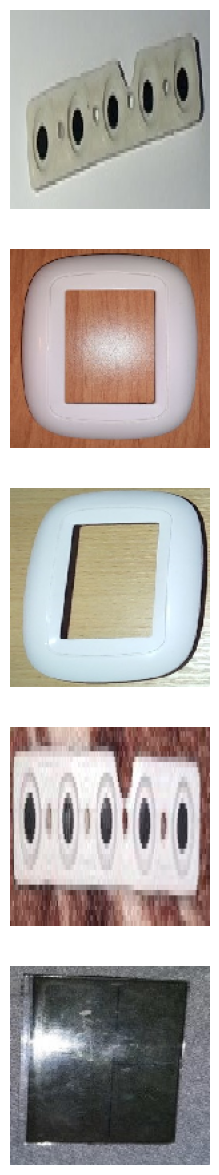

In [94]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 83 images belonging to 5 classes.


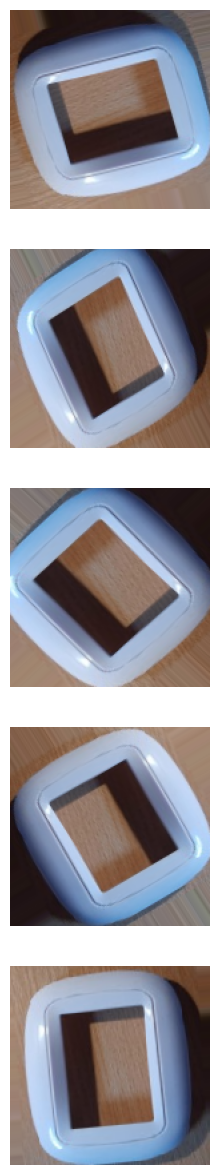

In [95]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [96]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 83 images belonging to 5 classes.


In [97]:
"""
model = Sequential()
model.add(Conv2D(128, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7))
"""
model = Sequential()
model.add(Conv2D(64, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, input_dim=784))
model.add(Dense(32, input_dim=784))
model.add(Dense(5, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 360000)            0         
                                                                 
 dense_18 (Dense)            (None, 64)                23040064  
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 5)                 165       
                                                     

In [98]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [99]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/64
1/1 [==============================] - 2s 2s/step - loss: 1.6183 - accuracy: 0.1446 - val_loss: 75.5693 - val_accuracy: 0.4576
Epoch 2/64
1/1 [==============================] - 1s 1s/step - loss: 68.3410 - accuracy: 0.4940 - val_loss: 84.3731 - val_accuracy: 0.2881
Epoch 3/64
1/1 [==============================] - 1s 1s/step - loss: 89.2821 - accuracy: 0.2771 - val_loss: 51.9435 - val_accuracy: 0.2881
Epoch 4/64
1/1 [==============================] - 1s 1s/step - loss: 55.9438 - accuracy: 0.3373 - val_loss: 19.7849 - val_accuracy: 0.3390
Epoch 5/64
1/1 [==============================] - 1s 1s/step - loss: 21.2584 - accuracy: 0.3494 - val_loss: 4.2196 - val_accuracy: 0.3898
Epoch 6/64
1/1 [==============================] - 2s 2s/step - loss: 5.3037 - accuracy: 0.3614 - val_loss: 2.3176 - val_accuracy: 0.4746
Epoch 7/64
1/1 [==============================] - 2s 2s/step - loss: 2.5271 - accuracy: 0.4458 - val_loss: 1.6725 - val_accuracy: 0.5932
Epoch 8/64
1/1 [=================

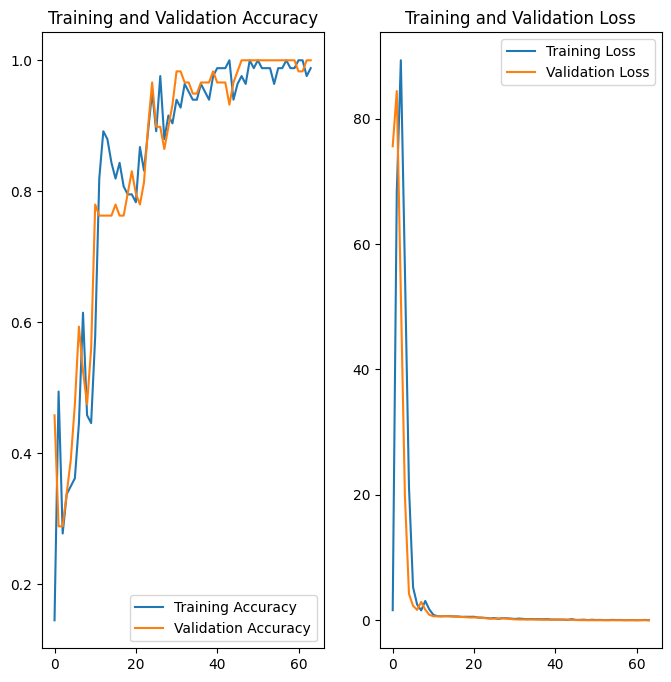

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [102]:
#save model

model.save('./saved_model/97_percent')

INFO:tensorflow:Assets written to: ./saved_model/97_percent\assets


INFO:tensorflow:Assets written to: ./saved_model/97_percent\assets


1/1 [==============================] - 0s 103ms/step


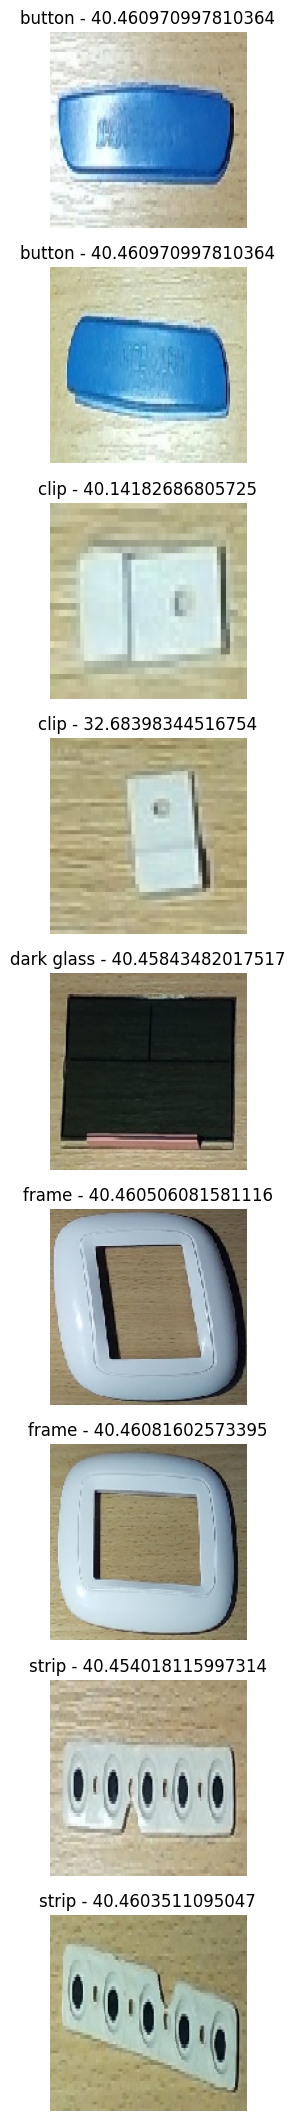

In [101]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)


predictionPercent = []
predictionLabel = []
name = ["button", "clip", "dark glass", "frame", "strip"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
